##### Data-Mining the Audio of Oral History - TECHNE workshop Mar 2017

# 4 Automated Methods - Clustering


Now we know how to extract features for a section of audio, we can do this on whole files (and so whole folders, or archives) and apply some basic machine learning techniques which enable us to automatically sort data. 

These machine learning methods are provided by the sklearn library, so we'll load that up too.


In [41]:
%pylab inline 
from IPython.display import Audio
import librosa, scipy, sklearn

Populating the interactive namespace from numpy and matplotlib


### Load files
We'll take all 10 mins (10x60 seconds) 

In [42]:
fileM = "../Maurice_extract_10.wav"
yM, srM = librosa.load(fileM, duration = 10*60)

fileF = "../Madeleine_extract_10.wav"
yF, srF = librosa.load(fileF, duration = 10*60)

yM = librosa.util.normalize(yM)
yF = librosa.util.normalize(yF)

# Once you've run the cell, wait for "In [*]" to turn into number before running the next cell
# it will take a little while to load up .. be patient ... 

### Segmentation.
Next we want to segment each one into small sections and calculate features for each section, or *frame* of audio. By calculating values for features across lots of small sections, we sample each audio file more effectively, capturing local variations. To go back to image analogy, imagine trying to summarise the colour of a whole image: if you averaged over all the pixels, it would be a murky brown colour. If you chopped it up into a mosaic, then you'd get blue bits, red bits, white bits etc. and you could say something more useful about the distribution of colours over all. We are doing just that, but for characteristics of sound (which our features describe).

In [43]:
# define the length of each segment -- or frame -- at 1 second
frame_sz = int(srF) 

# and create an array to hold the values in -- this is just a list of all the features
segment_start_times = np.zeros((yF.size/frame_sz), dtype=np.int )


# check we've got the expected amount 
segment_start_times.size 

yM.size/srM

600

Then write the start times (in frame number) into the array

In [45]:
  
for i in range(segment_start_times.size):
    segment_start_times[i]=(i*frame_sz)
        

# let's have a look at it:               
print segment_start_times.size
print segment_start_times

# dont worry - this shouldn't mean anything to you - just shows that its a list of starting times, in frames 
# each one is 1 second long - remember our sample rate was 22050
            

600
[       0    22050    44100    66150    88200   110250   132300   154350
   176400   198450   220500   242550   264600   286650   308700   330750
   352800   374850   396900   418950   441000   463050   485100   507150
   529200   551250   573300   595350   617400   639450   661500   683550
   705600   727650   749700   771750   793800   815850   837900   859950
   882000   904050   926100   948150   970200   992250  1014300  1036350
  1058400  1080450  1102500  1124550  1146600  1168650  1190700  1212750
  1234800  1256850  1278900  1300950  1323000  1345050  1367100  1389150
  1411200  1433250  1455300  1477350  1499400  1521450  1543500  1565550
  1587600  1609650  1631700  1653750  1675800  1697850  1719900  1741950
  1764000  1786050  1808100  1830150  1852200  1874250  1896300  1918350
  1940400  1962450  1984500  2006550  2028600  2050650  2072700  2094750
  2116800  2138850  2160900  2182950  2205000  2227050  2249100  2271150
  2293200  2315250  2337300  2359350  2381400  

We know both files are the same length and both have the same sample rate, so we can use the same list of start times to create a list of segments for each audio file

In [46]:
# Create 1 second segments of the male voice
mSegments = numpy.array([yM[i:i+frame_sz] for i in segment_start_times])

# and of the female
fSegments = numpy.array([yF[i:i+frame_sz] for i in segment_start_times])



In [7]:
# Let's have a listen to the first second of the male

Audio(data = mSegments[0], rate = srM)

In [8]:
# and the female
Audio(data = fSegments[0], rate = srF)

**E**: Change the value in the square bracket to listen to a different segment .. 

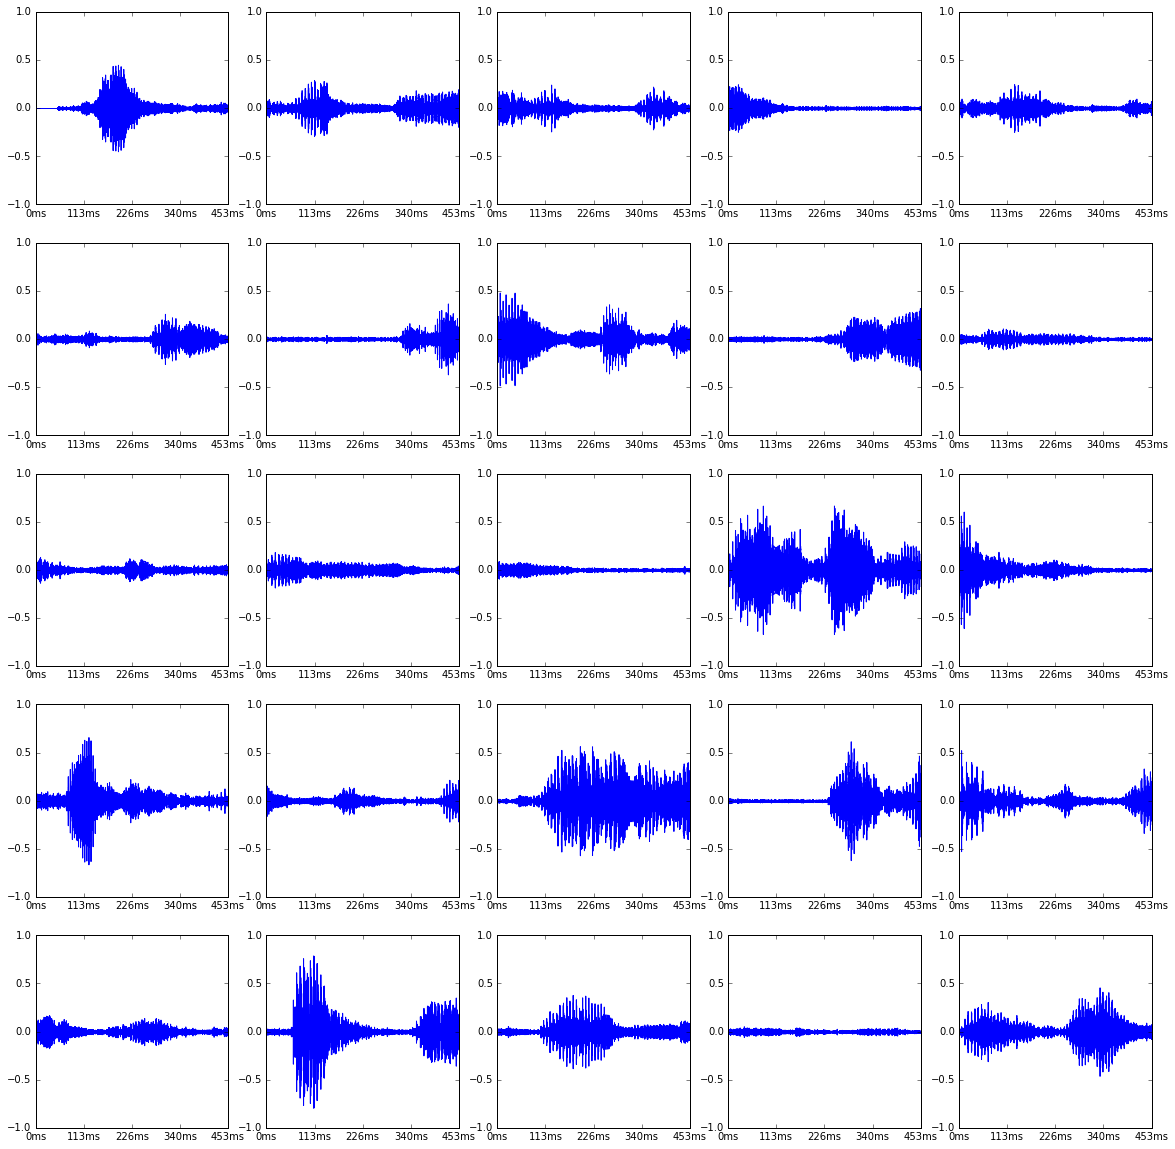

In [47]:
# Let's have a look at the first 25 seconds of Maurice:
figsize(20, 20)
for i, x in enumerate(mSegments[:25]):
#for i, x in enumerate(mauSegments):
    # arguments to subplot are N rows, N columns, current plot
    plt.subplot(5, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)
    


## Constructing a Feature Vector

A *feature vector* is just a collection of features. Below is a simple function that constructs a two-dimensional feature vector from a signal. 
Here we defined a function to calculate a bunch of features - the ones we looked at in notebook 3 (time domain feature, zero-crossing_rate and freq domain signal, spectral centroid)


In [23]:
def extract_spectral_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0].mean(),
        librosa.feature.spectral_centroid(signal)[0].mean(),
        librosa.feature.spectral_bandwidth(signal)[0].mean(),
        librosa.feature.spectral_contrast(signal)[0].mean(),
        librosa.feature.spectral_rolloff(signal)[0].mean(),
    ]

We can then join up the feature vectors (a list of two or more features) for all the signals in a collection (audio segments). In this case, we already know that one is male and one is female, but we could do this same thing for a folder, or entire archive of audio which we might not know anything about.

In [51]:
m_features = numpy.array([extract_spectral_features(x) for x in mSegments])
f_features = numpy.array([extract_spectral_features(x) for x in fSegments])
# wait for it to finish .. it will take a while to calculate it all

In [53]:
# let's take a peek -- it's just a bunch of numbers which won't mean much
m_features

array([[  1.38216886e-01,   2.17915684e+03,   1.96755647e+03,
          1.64166640e+01,   3.92197931e+03],
       [  1.04969371e-01,   2.01206379e+03,   1.88420816e+03,
          1.23713701e+01,   3.70248746e+03],
       [  1.19695490e-01,   2.14255868e+03,   2.00046244e+03,
          1.32591843e+01,   4.01520830e+03],
       ..., 
       [  1.03804155e-01,   1.94313113e+03,   2.07886480e+03,
          1.39070626e+01,   3.79253540e+03],
       [  1.13547585e-01,   2.12095308e+03,   2.09830165e+03,
          1.47238148e+01,   4.01496360e+03],
       [  8.55934837e-02,   1.91099152e+03,   2.08022870e+03,
          1.48257010e+01,   3.66088923e+03]])

So let's visualise the features in order to get a sense of which best differentiate between the files
We plot all the the male and all the female features together so we can compare them.



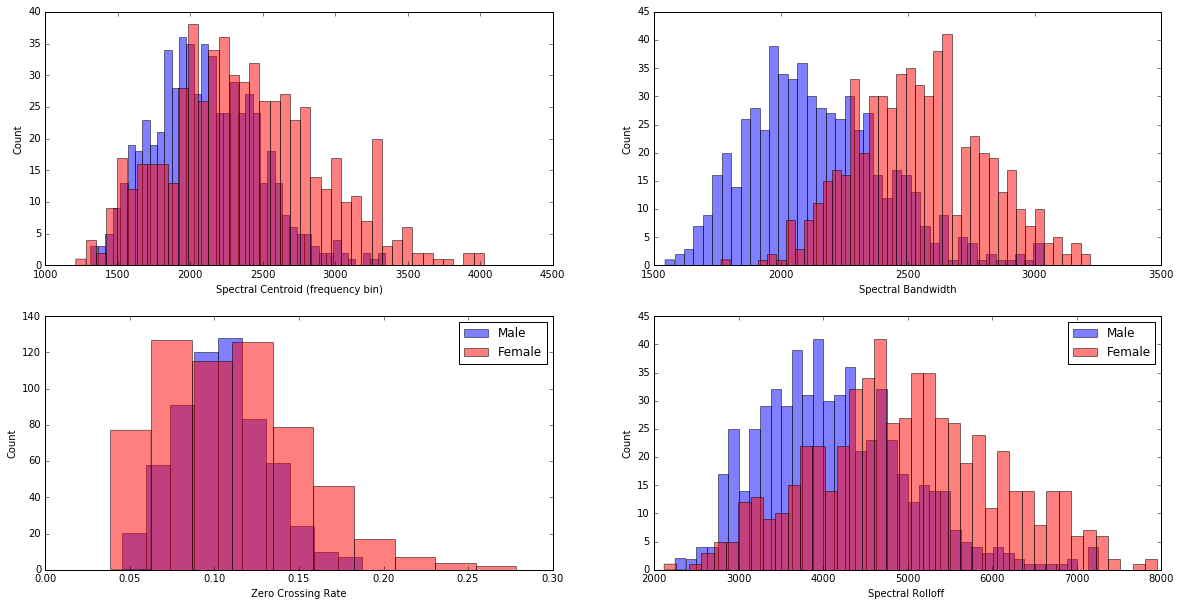

In [55]:

figsize(20, 10)

plt.subplot(2, 2, 1)
plt.hist(m_features[:,1], color='b',  bins=40, alpha=0.5)
plt.hist(f_features[:,1], color='r',  bins=40, alpha=0.5)
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(m_features[:,2], color='b',  bins=40, alpha=0.5)
plt.hist(f_features[:,2], color='r',  bins=40, alpha=0.5)
plt.xlabel('Spectral Bandwidth')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(m_features[:,0], color='b',  alpha=0.5)
plt.hist(f_features[:,0], color='r',  alpha=0.5)
plt.legend(('Male', 'Female'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')


plt.subplot(2, 2, 4)
plt.hist(m_features[:,4], color='b',  bins=40, alpha=0.5)
plt.hist(f_features[:,4], color='r', bins=40, alpha=0.5)
plt.xlabel('Spectral Rolloff ')
plt.ylabel('Count')

plt.legend(('Male', 'Female'))


Male (Maurice) is blue and female (madeleine) is red ... so the purple is where they overlap.
We are looking for ones where the blue and red show different distributions -- different patterns of features. 
So here spectral bandwidth looks good, spectral rolloff isn't bad. Zero crossing has a lot of overlap, but the male  and female have quite different distributions: Maurice is more focused in the middle and Madeleine has two peaks.

Remember how Madeleine had lots of pauses and a wide spread of energy across the spectrum? We see the same thing here: Spectral bandwidth is overall higher for Madeleine, and zero-crossing shows the mix of high and low values we observed previously. 


## Feature Scaling

The features that we used in the previous example included zero crossing rate and spectral centroid. These two features are expressed using different units. This discrepancy can pose problems when performing classification later. Therefore, we will normalize each feature vector to a common range and store the normalization parameters for later use.

Many techniques exist for scaling your features. For now, we'll use **sklearn.preprocessing.MinMaxScaler**. MinMaxScaler returns an array of scaled values such that each feature dimension is in the range -1 to 1.

Let's group all of our feature vectors into one feature table:


In [57]:
feature_table = numpy.vstack((m_features, f_features))
print feature_table.shape

(1200, 5)


In [59]:
# now we make them all the same range so we can compare them
# Scale each feature dimension to be in the range -1 to 1:

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
feature_table = scaler.fit_transform(feature_table)
print feature_table.min(axis=0)
print feature_table.max(axis=0)



[-1. -1. -1. -1. -1.]
[ 1.  1.  1.  1.  1.]


Now we can plot them to see just how differnt the features are.

Let's try spectral bandwith (no 2) and Zero-crossing (no 3) 
Maurice is still blue and Madeleine is red

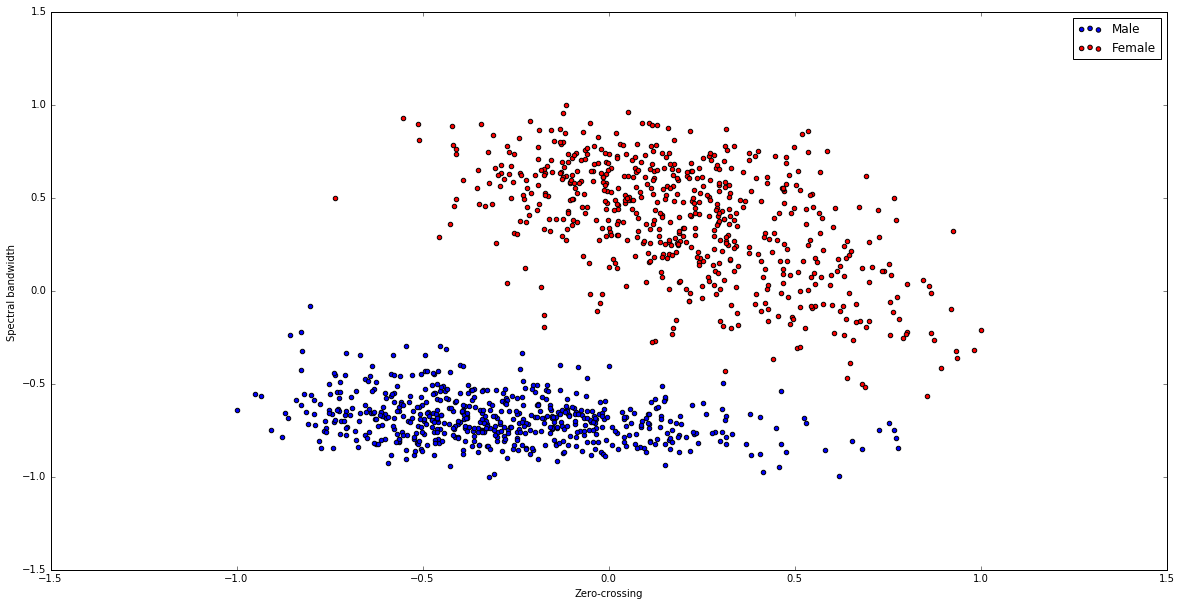

In [69]:
plt.scatter(feature_table[:600,2], feature_table[:600,3], c='b')
plt.scatter(feature_table[600:,2], feature_table[600:,3], c='r')
plt.ylabel('Spectral bandwidth ')
plt.xlabel('Zero-crossing')

plt.legend(('Male', 'Female'))

This looks good -- the blue dots are all the one second segments of Maurice and the red dots are all the one second segments of Madeleine and they are quite distinct.



# Automatic Clustering


In our scatter plots we saw that some of the audio characteristics had  different ranges of values for Maurice vs Madeleine's recorings. The two files produced a red and a blue cluster respectively. We could maybe draw a line between them and guess which points belong to Maurice (and his interviewer) and which to Madeleine (and her interviewer).
If we are dealing with 1000s of GB, TB or PB of audio, we need to automate this process.
    
We can use an "unsupervised clustering" algorithm. This basically looks at the features for each one second and organises them into ones which are most similar. It doesn't know anything about men or women, or maurice, or resistance. To go back to our mosaic, it's a dumb robot with a pile of paper pieces, laying them out on a table according to which ones are most similar.     


So we tell the model that we want two groups (n_clusters = 2) and we ask it to "predict" which group each segment belongs to

In [80]:
model = sklearn.cluster.KMeans(n_clusters=2)
# and add all the data combined
labels = model.fit_predict(feature_table)

The algorithm goes through all the one second segments, looks at the features and decides whether it is in one of two groups. 

Remember that we joined all the one features together, so the first 600 are maurice and the second 600 are madeleine.
If it has sorted them successfully we should see all the ones together, followed by all the zeros. It doesnt matter which order they are in -- it has no idea which is which, just that they are different.

Let's print them:

In [84]:
for x in labels:
    print x

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1


That looks pretty good, but will make your eyes go funny if you look too closely. Let's plot the two groups it found:

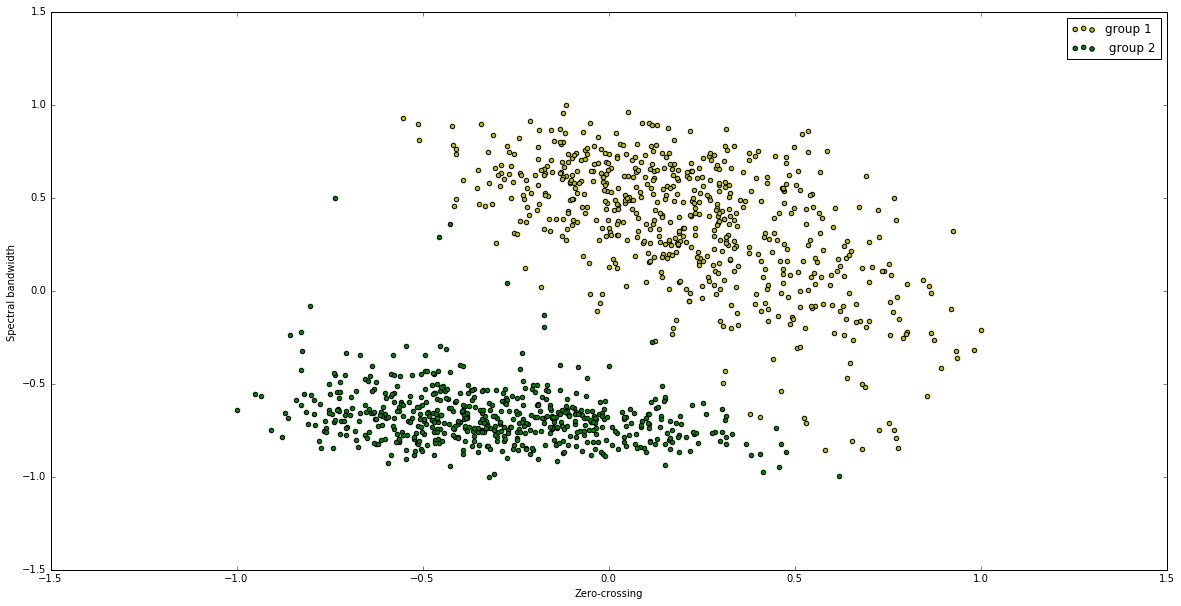

In [86]:
# use the Spectral bandwidth (2) and zero-crossing (3) as these looked the most promising above:

plt.scatter(feature_table[labels==0,2], feature_table[labels==0,3], c='y')
plt.scatter(feature_table[labels==1,2], feature_table[labels==1,3], c='g')
#plt.scatter(feature_table[labels==2,0], feature_table[labels==2,4], c='g')
#plt.scatter(feature_table[labels==3,0], feature_table[labels==3,4], c='y')

plt.ylabel('Spectral bandwidth ')
plt.xlabel('Zero-crossing')

#plt.ylabel('Spectral rolloff')
#plt.legend((' 0', ' 1', '2', '3'))
plt.legend(('group 0', ' group 1'))

Looks good? Let's compare to the *actual* groupings - the yellow dots (0) should be in the same place as blue (male) and green (1) as red (female)

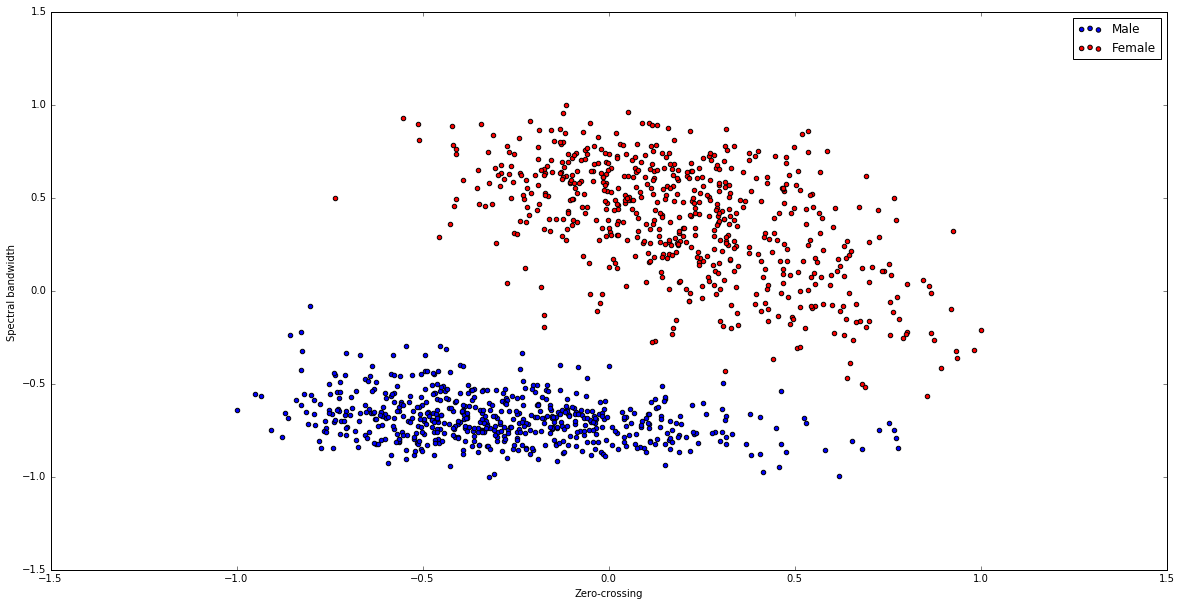

In [77]:
plt.scatter(feature_table[:600,2], feature_table[:600,3], c='b')
plt.scatter(feature_table[600:,2], feature_table[600:,3], c='r')
plt.ylabel('Spectral bandwidth ')
plt.xlabel('Zero-crossing')

plt.legend(('Male', 'Female'))

Hey presto, we have sorted the two files successfully.

This is obviously a toy example. We already knew the two files were different. But if we have hours or hundreds of hours of audio we could do the same thing, and use these automatic classifications to save the files into different folders, automatically organising our files for us. 

Even with this very simple technique, we could remove silence, sort urban vs wildlife recordings, different music styles etc.

More complex machine learning algorithms we can train to recognise particular voices, or patterns of speech. 
These methods have been developed for analysing music, but are relatively unexplored in sound art, field recordings and oral history. There is lots of room for experimentation .... 



### Extension: 
Try loading up your own files and exploring the libraries further. Once we have our data in this format, we can explore many other ways of clustering and classifying audio ... 



# Affinity Propagation

In scikit-learn, other clustering algorithms such as **affinity propagation** can cluster without defining the number of clusters beforehand.

All we need to do is swap out KMeans for AffinityPropagation:


In [36]:
model = sklearn.cluster.AffinityPropagation()
labels = model.fit_predict(feature_table)
print labels


[ 0  4  4 ..., 17 20 16]


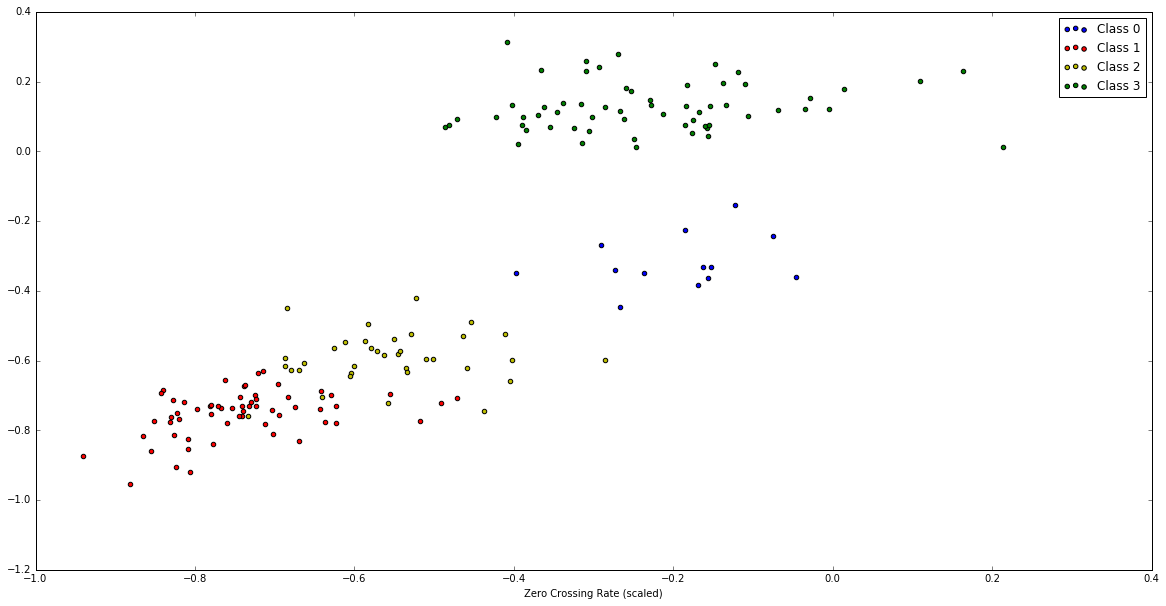

In [37]:
plt.scatter(feature_table[labels==0,0], feature_table[labels==0,4], c='b')
plt.scatter(feature_table[labels==1,0], feature_table[labels==1,4], c='r')
plt.scatter(feature_table[labels==2,0], feature_table[labels==2,4], c='y')
plt.scatter(feature_table[labels==3,0], feature_table[labels==3,4], c='g')

plt.xlabel('Zero Crossing Rate (scaled)')
# plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3'))